In [27]:
import pandas as pd
import numpy as np
import nltk
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error

In [2]:
books = pd.read_csv('all_books.csv', index_col=0)

In [3]:
books.head()

,author,title,text
0,austen,Emma-JA,"['volume', 'chapter', 'emma', 'woodhouse', 'ha..."
1,austen,LS-JA,"['lady', 'susan', 'vernon', 'mr', 'vernon', 'l..."
2,austen,Mansfield-JA,"['chapter', 'thirty', 'year', 'ago', 'miss', '..."
3,austen,Northranger_Abbey-JA,"['advertisement', 'authoress', 'northanger', '..."
4,austen,PP_JA,"['chapter', '1', 'truth', 'universally', 'ackn..."


In [11]:
freqdist = FreqDist(books.text)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import label_binarize

In [15]:
bookvect = CountVectorizer()

In [16]:
# count vectorize all the text of books
X_train_counts = bookvect.fit_transform(books['text'])

In [23]:
target = books.author
y = label_binarize(target, classes=['austen', 'dickens', 'doyle', 'emerson', 'hawthorne', 'keats',
       'melville', 'milton', 'poe', 'shakespeare', 'twain', 'wilde'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_train_counts, y, stratify=y)

In [25]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42,bootstrap=True, n_jobs=1)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
# make prediction and compare them 
rf_pred = rf.predict(X_test)

# Calculate the absolute errors
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_pred))


In [29]:
rmse_rf

0.1783802881791717

In [31]:
errors = abs(rf_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.07


In [32]:
# we can see that random forest performed better than linear regression because it averages out the variance...but
# can we tune the model even more to achieve better performance?

#adjusting max_features : number of features we're using when considering best splits 
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1 , max_features = "sqrt")
rf_new.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
# make prediction and compare them 
rf_pred = rf_new.predict(X_test)

# Calculate the absolute errors
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_pred))
rmse_rf

0.19981113531512296

In [34]:
errors = abs(rf_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.09


In [35]:
# growing more trees also help 
rf_new = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1 , max_features = "sqrt")
rf_new.fit(X_train,y_train)

rf_pred = rf_new.predict(X_test)

# Calculate the absolute errors
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_pred))
rmse_rf

0.19927197426605467

In [36]:
errors = abs(rf_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.09


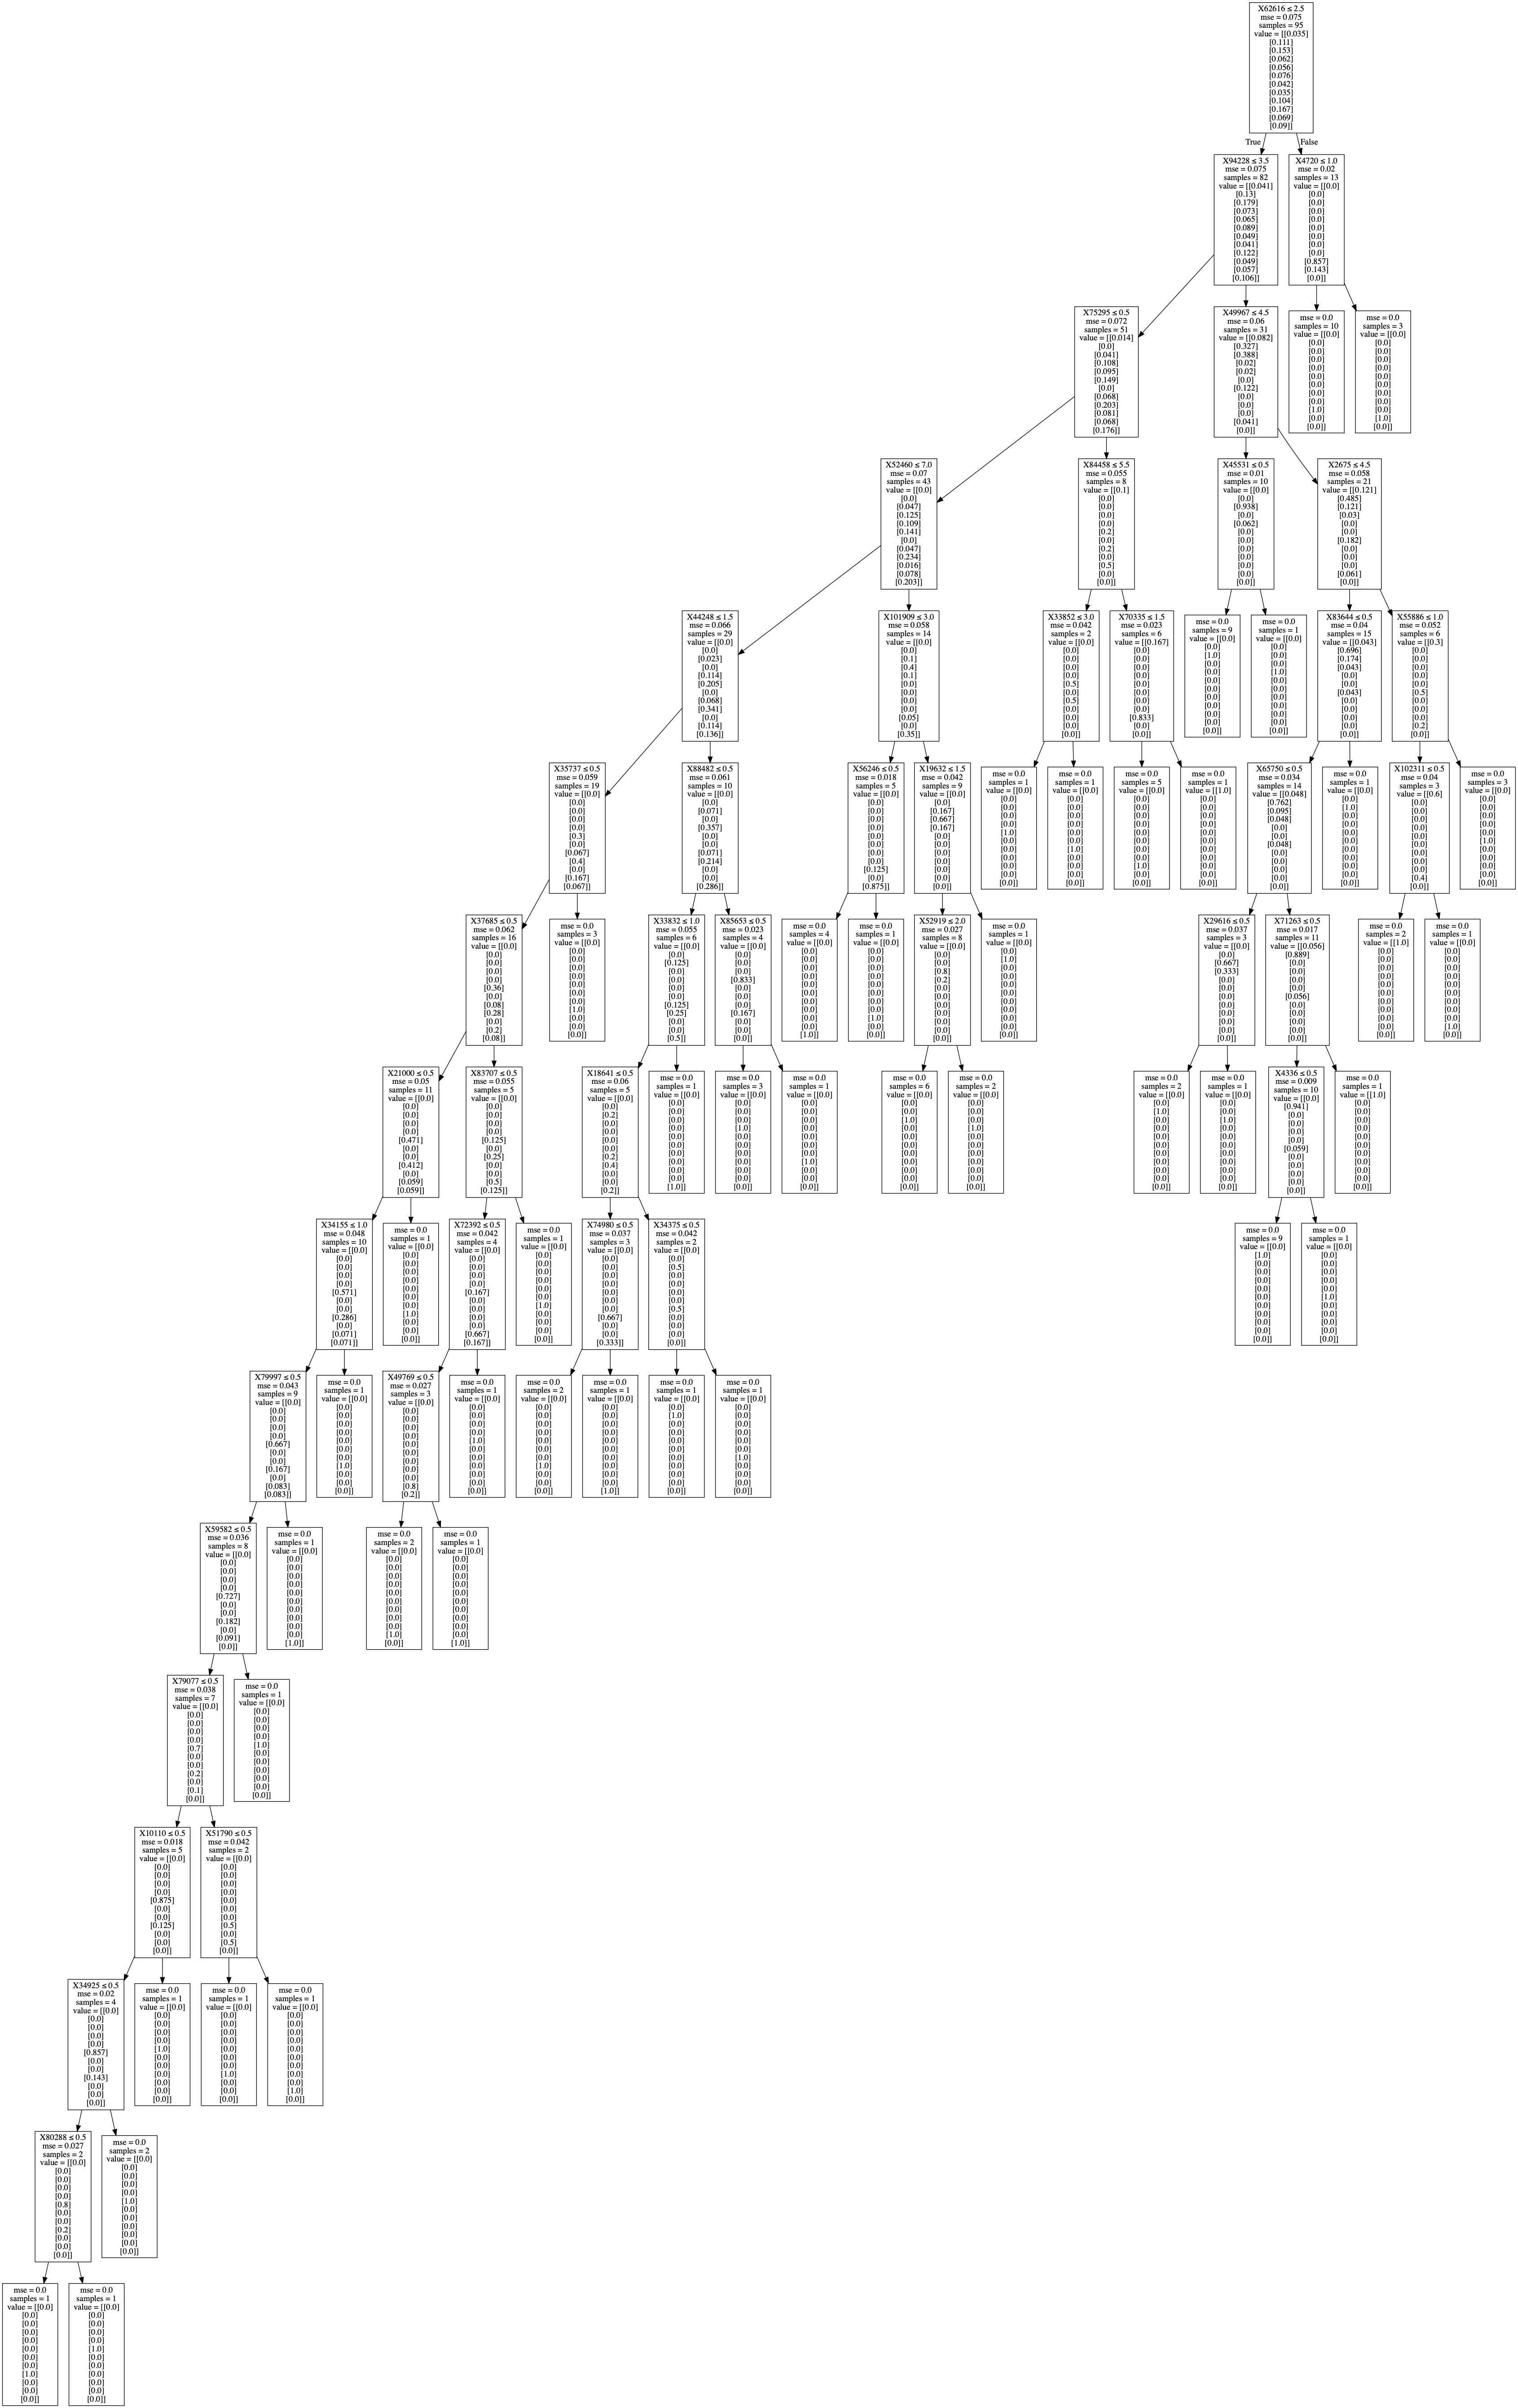

In [37]:
# Let's visualize one single dtree
# Import tools needed for visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Pull out one tree from the forest
tree = rf_new.estimators_[5]

# Export the image to a dot file
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 15


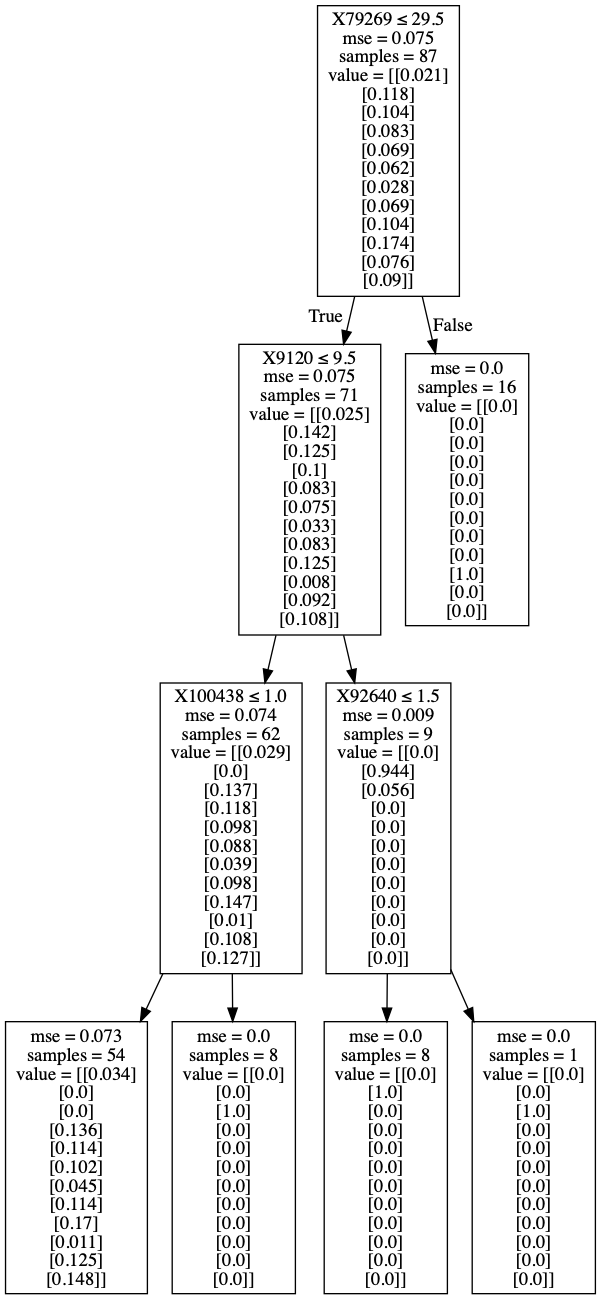

In [39]:
# limit the depth of the tree
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())